# Hand written digit classification using ANN

Importing required Libraries

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

Loading mnist data

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [6]:
x_train.shape  # 60000 data of 28x28 pixel images

(60000, 28, 28)

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
x_train[0] # 784 pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
y_train[0]

5

### showing image from pixel matrics

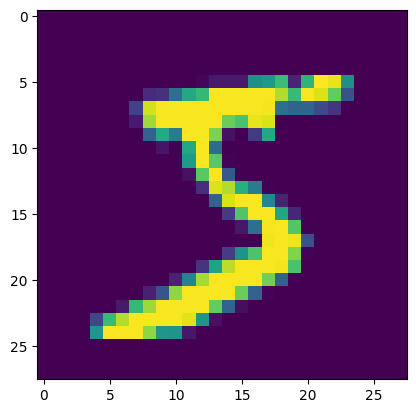

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

### converting all pixel values ranged in 0 to 1

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Creating an ANN Model

In [106]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # converting 28x28 2d array to 784 sized 1d array
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [107]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               200960    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

### model training

In [116]:
history = model.fit(x_train,y_train,epochs=16,validation_split=0.2)

Epoch 1/16
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.1166 - val_accuracy: 0.9776
Epoch 2/16
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.1424 - val_accuracy: 0.9754
Epoch 3/16
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0130 - accuracy: 0.9966 - val_loss: 0.1474 - val_accuracy: 0.9734
Epoch 4/16
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.1099 - val_accuracy: 0.9801
Epoch 5/16
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.1233 - val_accuracy: 0.9778
Epoch 6/16
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1786 - val_accuracy: 0.9747
Epoch 7/16
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.1451 - val_accuracy:

### Predicting output of x_test

In [117]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [122]:
y_pred = y_prob.argmax(axis=1) # giving output of highest probability

### predicting accuracy

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9813

### Plotting Loss curve

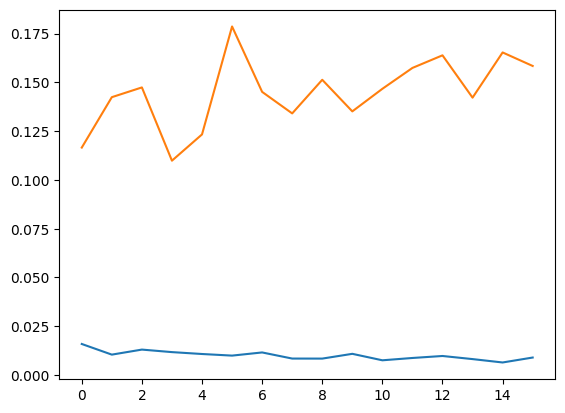

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Plotting accuracy Curve

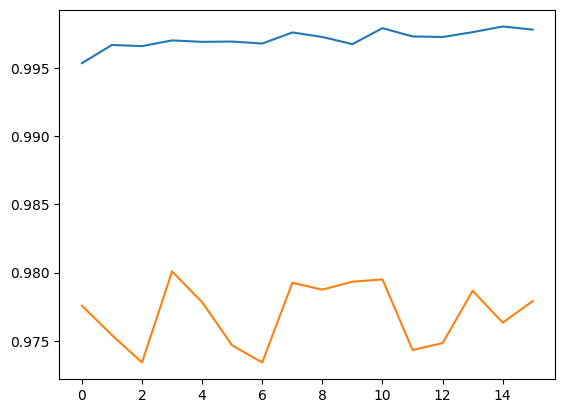

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [125]:
x_test[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

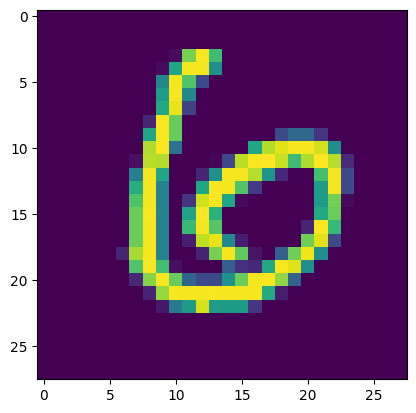

In [141]:
plt.imshow(x_test[11])

In [142]:
number = model.predict(x_test[11].reshape(1,28,28)).argmax(axis=1)

print("The predicted number is: ",number)

1/1 [==============================] - 0s 28ms/step
The predicted number is:  [6]
